In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mnist-digit-recognizer/train.csv


**a) uploadingthe data:**

In [38]:
#uploading the data
data=pd.read_csv('../input/mnist-digit-recognizer/train.csv')

In [59]:
print(data.shape) # to see if the data is flatten or not
print(data.columns) #to look for the label

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [60]:
y=data['label']   
X=data.drop(['label'],axis=1)

**b) to illustarte how the data looks like:**

Text(0.5, 1.0, '1')

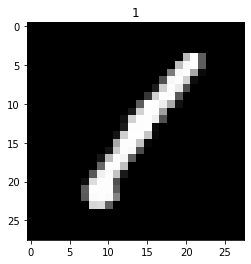

In [83]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

#to reshape our data from 784 (1D) into 28*28 (2D)  
X_arr=X.to_numpy()
NumberofSamples=X_arr.shape[0]
X_arr_2d=X_arr.reshape(X_arr.shape[0],28,28)

#plot in greyscale
plt.imshow(X_arr_2d[0], cmap='gray')
plt.title(y[0])


**c) data manipulation:**

In [84]:
#spliting our data into two subsets: training + test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [85]:
#convert y (labels) into onehot

from tensorflow import keras

num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

**d) model construction:**

In [86]:
#building the model

import tensorflow as tf
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

from tensorflow.keras import layers

model = keras.Sequential([
    #hidden
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=32, activation='relu'),
    #oupput
    layers.Dense(units=10,activation='softmax'),
])


In [97]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [98]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=10
)

Epoch 1/10
1050/1050 [==============================] - 2s 2ms/step - loss: 1.2811 - binary_accuracy: 0.8946 - val_loss: 0.2627 - val_binary_accuracy: 0.9113
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2332 - binary_accuracy: 0.9197 - val_loss: 0.1865 - val_binary_accuracy: 0.9310
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1786 - binary_accuracy: 0.9319 - val_loss: 0.1753 - val_binary_accuracy: 0.9262
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1573 - binary_accuracy: 0.9388 - val_loss: 0.1501 - val_binary_accuracy: 0.9423
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1404 - binary_accuracy: 0.9460 - val_loss: 0.1375 - val_binary_accuracy: 0.9489
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1284 - binary_accuracy: 0.9509 - val_loss: 0.1328 - val_binary_accuracy: 0.9508
Epoch 7/10
1050/1050 [==============================

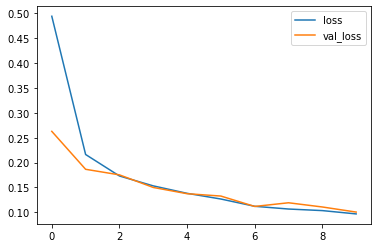

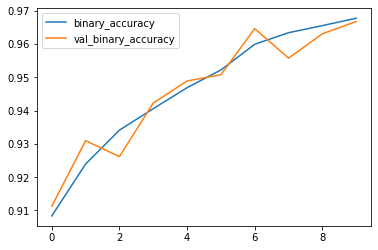

In [99]:
# examine the results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# comments:
 
1) some people prefer using this syntax instead of the above

In [89]:
import tensorflow as tf
from tensorflow.keras import layers

model=keras.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


2) if the data shape is given 2D, one needs to flatten it 

In [91]:
model=keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

*OR*

In [93]:
model = keras.Sequential([
    #hidden
    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=32, activation='relu'),
    #oupput
    layers.Dense(units=10,activation='softmax'),
])